## 1. Import Libraries

#### Let us import the required libraries and functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

## 2. Read Data
### Read and display data to gey insights from the data

In [2]:
data  = pd.read_csv('airline_passenger_satisfaction.csv') # read csv file using pandas
data.head() # display first 5 records of the dataframe

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## 3. Data Analysis and Preparation
### Data preparation is the process of cleaning and transforming raw data prior to building predictive models.
### Here we will analyze and prepare data to perform regression analysis:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data types. Refer data definition to ensure your data types are correct
3. If data types are not as per business context, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Study correlation
7. Analyze categorical variables
8. Analyze relationship between target variable and categorical variables
9. Perform feature engineering
10. Detect outliers
11. Recheck the correlation

### 3.1.1 Data Dimension

To Know the dimensions od the data:

In [3]:
data.shape #.shape returns the dimension of the data

(129880, 24)

We see the dataframe has `24` **columnns** and `129880` **observations**.

### 3.1.2 Data Types
In this section we will:

    1. check data types 

    2. Change incorrect data types
    
    3. Recheck the data types

In [4]:
data.dtypes # check types of data

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


Using the __*info function*__, we can pull the following information from our dataset :
>- We have __5 categorical variables__ and __19 numerical variables__
>- As data defination Departure Delay information in minutes, so dtypes will be float 
>- change dtypes of departure delay in float

In [5]:
data['Departure Delay'] = data['Departure Delay'].astype('float64')

In [6]:
## Recheck data types 
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                           float64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [7]:
data = data.drop('ID', axis = 1) # droping unnecessary parameter

## Summary Statistics
In our dataset we have numrecial and categorical variables. Now check for summary statistics of all variables

In [8]:
data.describe().T # for numerical variable

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
On-board Service,129880.0,3.383023,1.287099,0.0,2.0,4.0,4.0,5.0


In [9]:
data.describe(include='object') # for categorical data

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


### 0) Find any missing values, and outliers if any in the continuous field

## Missing Values
#### 	In order to get the count of missing values in each column, we use the in-built function .isnull().sum()

In [10]:
data.isnull().sum() # Checking for missing values

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

There is `393` null value present in column `Arrival Delay`.

In [11]:
# fill the missing values with the mean value of 'Arrival Delay' using 'fillna()'
# mean(): returns the mean Arrival Delay
data['Arrival Delay'] = data['Arrival Delay'].fillna(data['Arrival Delay'].mean())

In [12]:
## Check again for null values
data.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

Now, we obtain the dataset with no missing values.

## Preprocessing

In [13]:
## Check unique values for columns
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Male', 'Female'],
 'Customer Type': ['First-time', 'Returning'],
 'Type of Travel': ['Business', 'Personal'],
 'Class': ['Business', 'Economy', 'Economy Plus'],
 'Satisfaction': ['Neutral or Dissatisfied', 'Satisfied']}

In [14]:
df = pd.get_dummies(data,columns=['Gender','Customer Type','Type of Travel','Class'],drop_first=True)

In [15]:
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,2.0,5.0,3,3,4,3,3,3,...,5,3,5,5,Neutral or Dissatisfied,1,0,0,0,0
1,35,821,26.0,39.0,2,2,3,5,2,5,...,5,2,5,5,Satisfied,0,1,0,0,0
2,41,853,0.0,0.0,4,4,4,5,4,3,...,3,4,3,3,Satisfied,1,1,0,0,0
3,50,1905,0.0,0.0,2,2,3,4,2,5,...,5,2,5,5,Satisfied,1,1,0,0,0
4,49,3470,0.0,1.0,3,3,3,5,3,3,...,3,3,3,3,Satisfied,0,1,0,0,0


In [16]:
numrical_df = df.copy()

## Outlier Detection

In [17]:
X = df.drop('Satisfaction', axis=1).copy()
columns = [column for column in X.columns if len(X[column].unique())>2] #select columns having more than 2 unique values

In [18]:
len(columns)

18

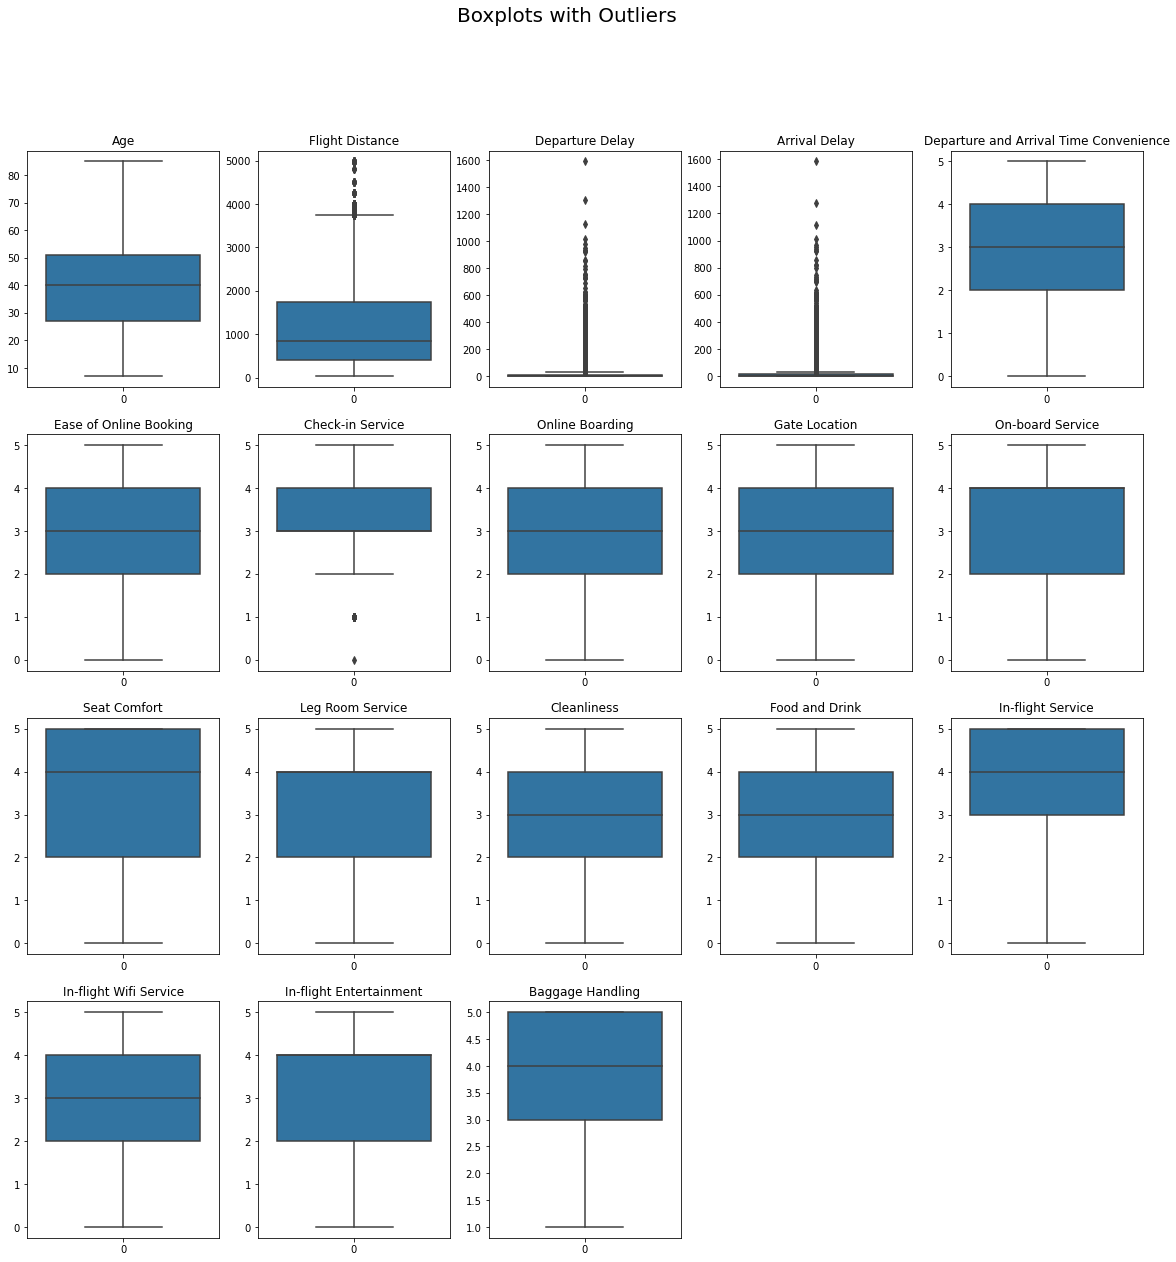

In [19]:
# visualizating outliers using boxplot
plt.figure(figsize=(20,20))

for i, column in enumerate(columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(data = X[column])
    plt.title(column)

plt.suptitle('Boxplots with Outliers',size=20)
plt.show()

In [20]:
threshold = 0.03

In [21]:
lower_bound = scipy.stats.norm.ppf(q=(threshold/2),loc=0,scale=1) 
lower_bound

-2.1700903775845606

In [22]:
upper_bound = scipy.stats.norm.ppf(q=1-(threshold/2),loc=0,scale=1)
print(upper_bound)

2.17009037758456


In [23]:
#removing outliers
def remove_outliers(df, columns, threshold):
    df = df.copy()
    # Calculate the lower and upper bond
    lower_bound = scipy.stats.norm.ppf(q=(threshold/2),loc=0,scale=1) 
    print(lower_bound)
    upper_bound = scipy.stats.norm.ppf(q=1-(threshold/2),loc=0,scale=1)
    print(upper_bound)
    # Calcuate z-score
    outlier_df = df.loc[:,columns].copy()
    z_scores = pd.DataFrame(scipy.stats.zscore(outlier_df,axis=0), index= outlier_df.index, columns=outlier_df.columns)
    # get indices of all outliers
    lower_outliers = (z_scores < lower_bound).any(axis=1)
    upper_outliers = (z_scores >= upper_bound).any(axis=1)
    outliers = df[pd.concat([lower_outliers,upper_outliers],axis=1).any(axis=1)].index
    
    #drop the outliers
    df = df.drop(outliers,axis=0).reset_index(drop=True)
    return df

`threshold` is giving us where along x-axis are we going to make the cut when we going to say these are outliers and thesea aren't.
6% is the part of data that we are looking for outliers.

In [24]:
removed_outlier_df = remove_outliers(df=df,
               columns=['Flight Distance',
                       'Departure Delay',
                       'Check-in Service',
                       'Arrival Delay'],
               threshold=0.06)

-1.880793608151251
1.8807936081512509


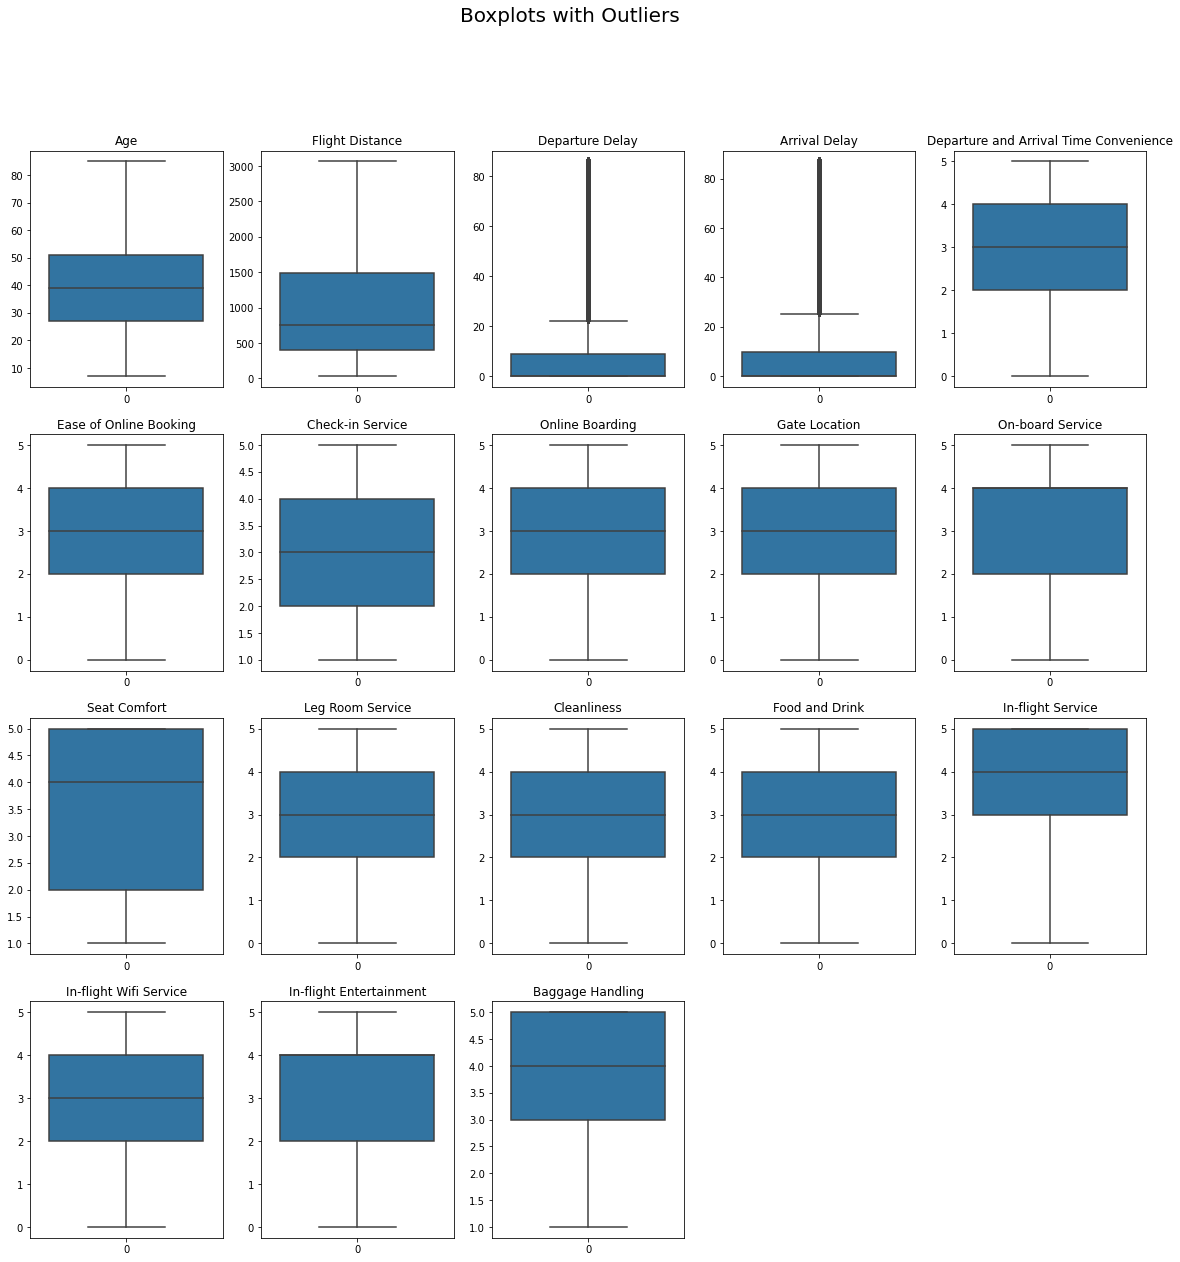

In [25]:
# After removing outliers again visualizing 
plt.figure(figsize=(20,20))

for i, column in enumerate(columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(data = removed_outlier_df[column])
    plt.title(column)

plt.suptitle('Boxplots with Outliers',size=20)
plt.show()

Apply another method using `IQR Method` for removing outliers

In [26]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 = numrical_df.drop(['Satisfaction'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = numrical_df.drop(['Satisfaction'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

Age                                         24.0
Flight Distance                           1330.0
Departure Delay                             12.0
Arrival Delay                               13.0
Departure and Arrival Time Convenience       2.0
Ease of Online Booking                       2.0
Check-in Service                             1.0
Online Boarding                              2.0
Gate Location                                2.0
On-board Service                             2.0
Seat Comfort                                 3.0
Leg Room Service                             2.0
Cleanliness                                  2.0
Food and Drink                               2.0
In-flight Service                            2.0
In-flight Wifi Service                       2.0
In-flight Entertainment                      2.0
Baggage Handling                             2.0
Gender_Male                                  1.0
Customer Type_Returning                      0.0
Type of Travel_Perso

In [27]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
df1 = numrical_df[~((numrical_df < (Q1 - 1.5 * IQR)) | (numrical_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
2,41,853,0.0,0.0,4,4,4,5,4,3,...,3,4,3,3,Satisfied,1,1,0,0,0
3,50,1905,0.0,0.0,2,2,3,4,2,5,...,5,2,5,5,Satisfied,1,1,0,0,0
4,49,3470,0.0,1.0,3,3,3,5,3,3,...,3,3,3,3,Satisfied,0,1,0,0,0
6,43,1963,0.0,0.0,3,3,4,4,3,5,...,5,3,5,5,Satisfied,1,1,0,0,0
7,60,853,0.0,3.0,3,4,3,4,4,3,...,3,4,3,3,Satisfied,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129860,30,337,0.0,0.0,2,2,4,5,2,3,...,4,2,5,5,Satisfied,0,1,0,0,0
129861,39,2667,1.0,0.0,0,0,5,5,1,3,...,3,0,3,3,Satisfied,0,1,0,0,0
129862,51,308,0.0,0.0,4,4,4,5,4,5,...,5,4,5,5,Satisfied,1,1,0,0,0
129863,39,2747,0.0,0.0,1,5,3,4,1,5,...,5,1,5,5,Satisfied,0,1,0,0,0


In [28]:
numrical_df.shape

(129880, 24)

In [29]:
df1.shape

(70608, 24)

In [30]:
# final data 
final_df = removed_outlier_df.copy()

In [31]:
final_df['Satisfaction'] = final_df['Satisfaction'].replace({'Neutral or Dissatisfied':0,'Satisfied':1})

##### After removing outliers we will check shape of dimension of the data 

In [32]:
df.shape

(129880, 24)

In [33]:
final_df.shape

(114496, 24)

In [34]:
final_df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,2.0,5.0,3,3,4,3,3,3,...,5,3,5,5,0,1,0,0,0,0
1,35,821,26.0,39.0,2,2,3,5,2,5,...,5,2,5,5,1,0,1,0,0,0
2,41,853,0.0,0.0,4,4,4,5,4,3,...,3,4,3,3,1,1,1,0,0,0
3,50,1905,0.0,0.0,2,2,3,4,2,5,...,5,2,5,5,1,1,1,0,0,0
4,43,1963,0.0,0.0,3,3,4,4,3,5,...,5,3,5,5,1,1,1,0,0,0


## Check for Normailty

    As per data information we have only `Age`,`Flight distance`, `Departure Delay`, `Arrival Delay` having continuous nature in data,
    so we will check for these features only.

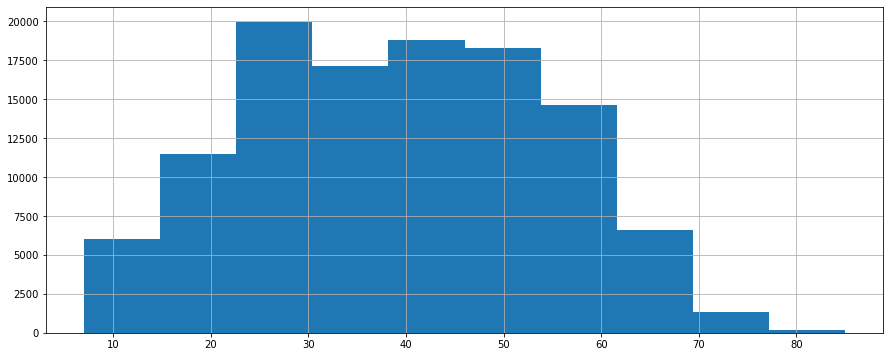

In [35]:
## check for normality of continuous variables using histgrom plot
# For Age 
plt.figure(figsize=(15,6))
final_df.Age.hist()
plt.show()

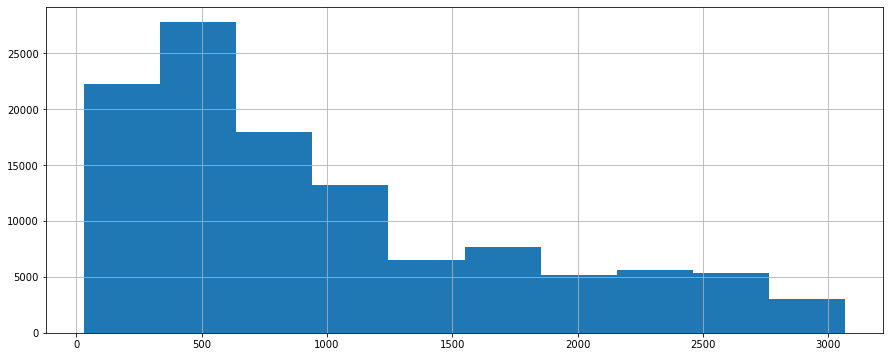

In [36]:
# for Flight Distance
plt.figure(figsize=(15,6))
final_df['Flight Distance'].hist()
plt.show()

After visulazing hsitogram plot, we can say that flight distance feature having right-skewed in nature

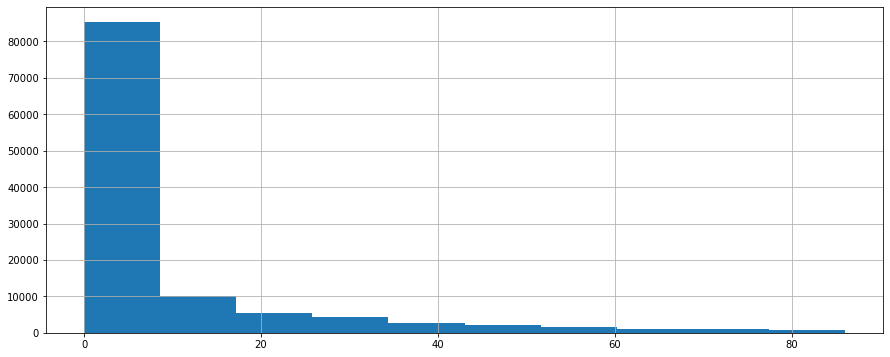

In [37]:
# for Departure Delay
plt.figure(figsize=(15,6))
final_df['Departure Delay'].hist()
plt.show()

After visulazing hsitogram plot, we can say that Departure Delay feature having right-skewed in nature

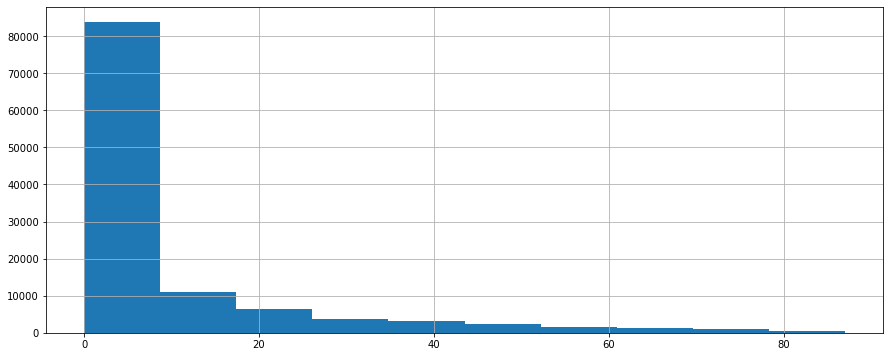

In [38]:
# for Arrival Delay
plt.figure(figsize=(15,6))
final_df['Arrival Delay'].hist()
plt.show()

After visulazing hsitogram plot, we can say that Arrival Delay feature having right-skewed in nature

#### We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights

In [39]:
from scipy.stats import jarque_bera
from scipy import stats
## Let us perform the Jarque-Bera test to check the normality
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(final_df["Age"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=2684.631, p-value=0.000
The data is not normally distributed (reject H0)


In [40]:
stat, p = jarque_bera(final_df["Flight Distance"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=17378.421, p-value=0.000
The data is not normally distributed (reject H0)


In [41]:
stat, p = jarque_bera(final_df["Departure Delay"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=283038.162, p-value=0.000
The data is not normally distributed (reject H0)


In [42]:
stat, p = jarque_bera(final_df["Arrival Delay"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=253483.168, p-value=0.000
The data is not normally distributed (reject H0)


Now we already checked contiuous nature feature is not normally distributed. 
To make normally distributed we will apply `log` in each feature.

# log transformation for normality using np.log()
final_df['log_age'] = np.log(final_df['Age'])
final_df['log_flight_distance'] = np.log(final_df['Flight Distance'])
final_df['log_departure_delay'] = np.log(final_df['Departure Delay'])
final_df['log_arrival_delay'] = np.log(final_df['Arrival Delay'])

## Logistic Regression

#### 1) Build a model using all the fields (doing appropriate conversions)

1a) Logistic Regression

1b) Decision Tree,

1c) Randomforest

1d) Naive Bayes

1e) AdaBoost, GDBoost, XGBoost

## Spliting Train and Test Data

In [43]:
X = final_df.drop('Satisfaction',axis=1)
y = final_df['Satisfaction']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) # splitting data into 90:10 parts

In [45]:
X_train.shape,y_train.shape

((103046, 23), (103046,))

In [46]:
X_test.shape,y_test.shape

((11450, 23), (11450,))

## Logistic Report before removing multicollinearity

In [47]:
## Build Logistic Model using statmodel
import statsmodels.api as sm
#Model statistics
#Must add constant for y-intercept
model_lr = sm.Logit(y_train, sm.add_constant(X_train)).fit()
y_pred = model_lr.predict(sm.add_constant(X_test))
print_model = model_lr.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.337889
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               103046
Model:                          Logit   Df Residuals:                   103022
Method:                           MLE   Df Model:                           23
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.5010
Time:                        09:06:11   Log-Likelihood:                -34818.
converged:                       True   LL-Null:                       -69770.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.3569   

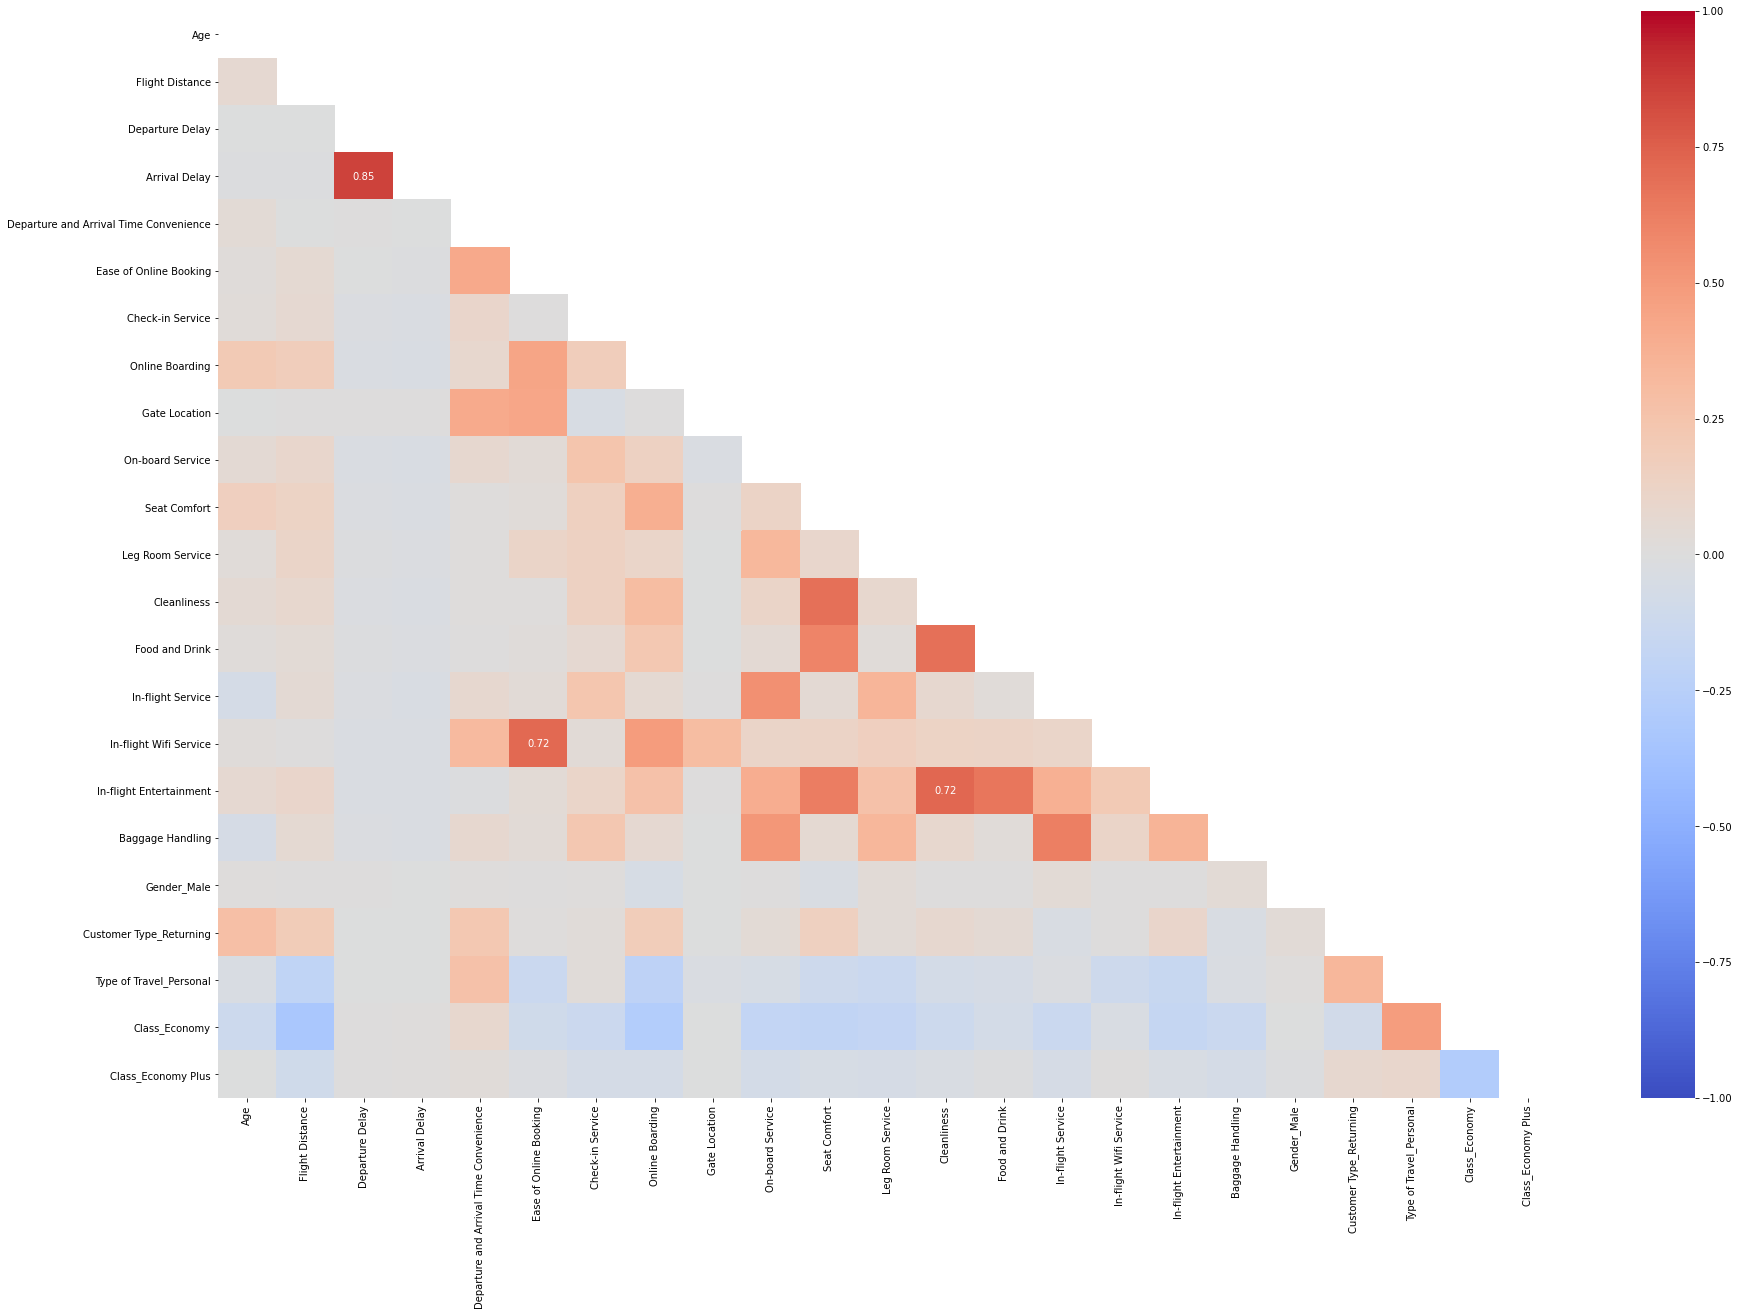

In [48]:
##finding multicollinearity
##Computing the correlation coefficient with NumWebPurchases

# set figure size
plt.figure(figsize=(30,20))

corr = final_df.drop('Satisfaction',axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,vmax=1.0,vmin=-1.0,cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.7 or less than -0.7 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

In [49]:
final_df.columns

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Gender_Male', 'Customer Type_Returning', 'Type of Travel_Personal',
       'Class_Economy', 'Class_Economy Plus'],
      dtype='object')

#### From the heatmap, we can identify strong relationships between:
- Arrival Delay and Departure Delay
- In-flight Wifi Service and Ease of Online Booking
- In-flight Entertainment and Cleanliness

In [50]:
## Computing VIF
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = final_df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [51]:
# features to consider check vif score
considered_features = ['Arrival Delay','Departure Delay','In-flight Wifi Service',
                       'Ease of Online Booking','In-flight Entertainment','Cleanliness']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,Arrival Delay,3.667528
1,Departure Delay,3.665814
2,In-flight Wifi Service,2.204976
4,In-flight Entertainment,2.182158
3,Ease of Online Booking,2.112589
5,Cleanliness,2.100338


- Already achieved vif score less than 5

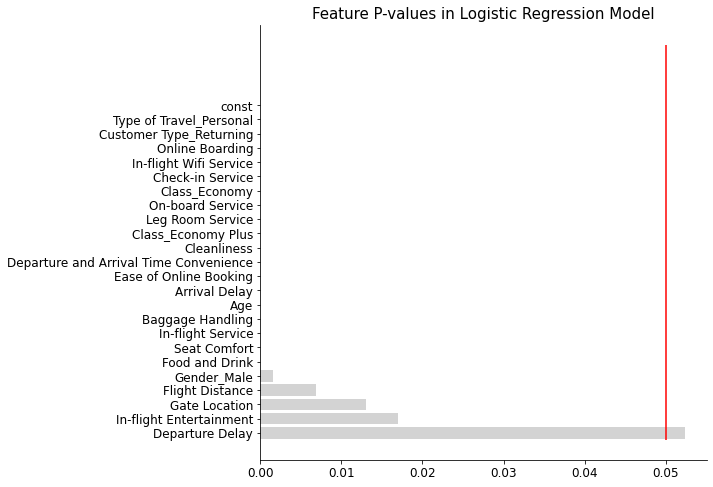

In [52]:
# Visualizing p_values 
p_values = pd.Series(model_lr.pvalues).sort_values(ascending=False)

plt.figure(figsize=(8,8))
plt.barh(y=p_values.index, width=p_values, color='lightgrey',)
plt.vlines(x=0.05, ymin=-0.5, ymax=27.25, colors='red')
sns.despine(right=True)
plt.title("Feature P-values in Logistic Regression Model", size=15)
plt.yticks(size=12)
plt.xticks(size=12)

plt.show()

In [53]:
# Drop Departure Delay columns which having high p-value.
df_final = final_df.drop('Departure Delay',axis=1)

In [54]:
df_final.columns

Index(['Age', 'Flight Distance', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Gender_Male', 'Customer Type_Returning', 'Type of Travel_Personal',
       'Class_Economy', 'Class_Economy Plus'],
      dtype='object')

## Spliting Train and Test Data

In [55]:
X = df_final.drop('Satisfaction',axis=1)
y = df_final['Satisfaction']

In [56]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1) # splitting data into 90:10 parts

In [57]:
Xtrain.shape,ytrain.shape

((103046, 22), (103046,))

In [58]:
Xtest.shape,ytest.shape

((11450, 22), (11450,))

### Logistic Report after removing multicollinearity

In-flight Entertainment    0.729295
Online Boarding            0.655248
In-flight Wifi Service     0.408997
Customer Type_Returning    0.292928
On-board Service           0.231774
dtype: float64


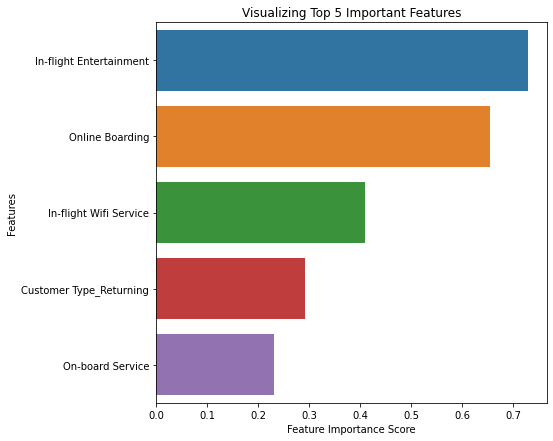

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
#Create a logistic Regression
log = LogisticRegression()
# fit the model
log.fit(Xtrain,ytrain)
#predict the model
ypred = log.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(log.coef_[0], 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

## Customer satisfied on these features 'In-flight Entertainment', 'Online Boarding','In-flight Wifi Service','Customer Type_Returning' and ' On-board Service'.

In [60]:
print("accuracy_score for logistic regression", round(accuracy_score(ypred,ytest),2))

accuracy_score for logistic regression 0.84


## Decision Tree

Online Boarding            0.353981
In-flight Wifi Service     0.188270
Type of Travel_Personal    0.142934
In-flight Entertainment    0.039113
Customer Type_Returning    0.030862
dtype: float64


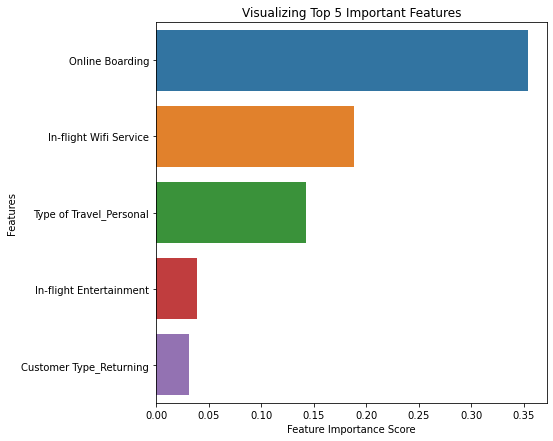

In [61]:
from sklearn.tree import DecisionTreeClassifier
#Create a Decision Tree Classifier
dt = DecisionTreeClassifier()
# fit the model
dt.fit(Xtrain,ytrain)
#predict the model
ypred = dt.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(dt.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

In [62]:
print("accuracy_score for decision tree", round(accuracy_score(ypred,ytest),2))

accuracy_score for decision tree 0.94


## Random Forest 

Online Boarding            0.177957
In-flight Wifi Service     0.158603
Type of Travel_Personal    0.101285
Class_Economy              0.071168
Seat Comfort               0.048288
dtype: float64


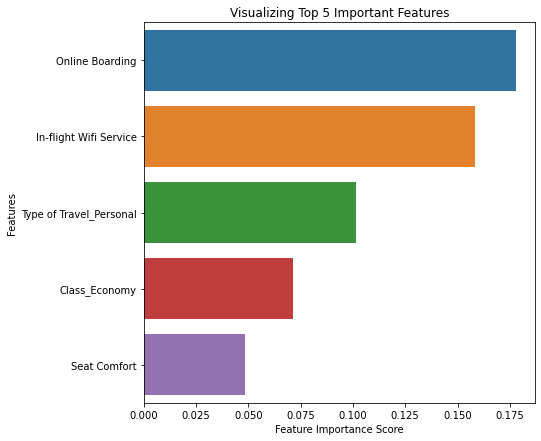

In [63]:
from sklearn.ensemble import RandomForestClassifier
# Create the random forest
rf = RandomForestClassifier()
# fit the model
rf.fit(Xtrain,ytrain)
#Predict the model
ypred = rf.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(rf.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

In [64]:
print("accuracy_score for Random Forest", round(accuracy_score(ypred,ytest),2))

accuracy_score for Random Forest 0.96


## Navie Bayes

Type of Travel_Personal    0.061524
In-flight Wifi Service     0.021961
Online Boarding            0.016344
Customer Type_Returning    0.012887
Class_Economy              0.010390
dtype: float64


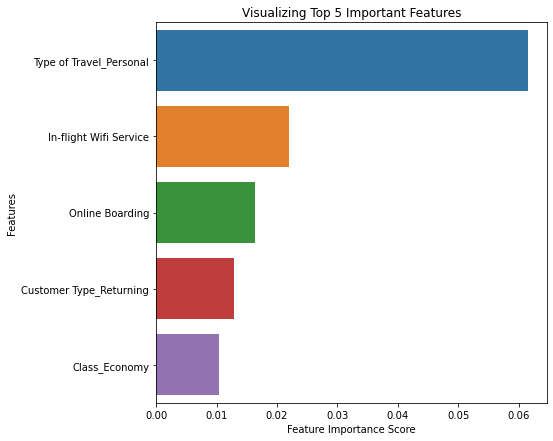

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

#Create the Gaussian Navie Bayes model
model = GaussianNB()
# fit the model
model.fit(Xtrain,ytrain)
#Predict the model
ypred = model.predict(Xtest)

# Summarize feature importance scores
# perform permutation importance
results = permutation_importance(model, Xtrain,ytrain, scoring='accuracy')
# get importance
importance = results.importances_mean

# Summarize feature importance scores
feature_imp = pd.Series(importance, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

In [66]:
print("accuracy_score for Navie Bayes", round(accuracy_score(ypred,ytest),2))

accuracy_score for Navie Bayes 0.86


## AdaBoost

In-flight Wifi Service     0.16
Online Boarding            0.10
Type of Travel_Personal    0.08
Seat Comfort               0.08
On-board Service           0.06
dtype: float64


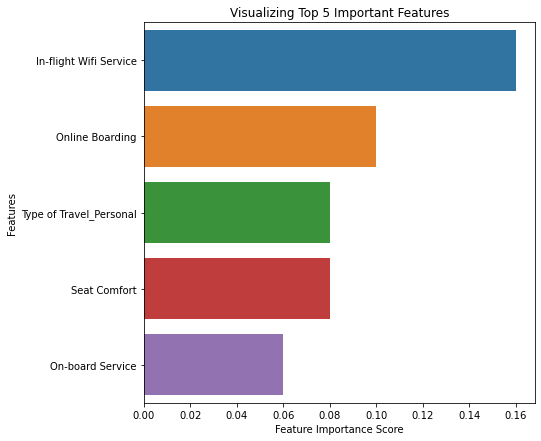

In [67]:
from sklearn.ensemble import AdaBoostClassifier
# Create AdaBoost Classifier model
ada = AdaBoostClassifier()
# fit the model
ada.fit(Xtrain,ytrain)
#predict the model
ypred = ada.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(ada.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

In [68]:
print("accuracy_score for AdaBoost", round(accuracy_score(ypred,ytest),2))

accuracy_score for AdaBoost 0.93


## GDBoost

Online Boarding            0.391696
In-flight Wifi Service     0.240276
Type of Travel_Personal    0.181128
Class_Economy              0.041745
In-flight Entertainment    0.038550
dtype: float64


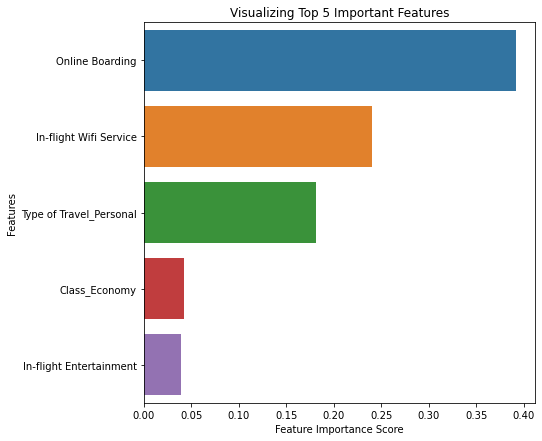

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
#Create the Gradient Boosting Classifier model
gdb = GradientBoostingClassifier()
# fit the model
gdb.fit(Xtrain,ytrain)
#Predict the model
ypred = gdb.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(gdb.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

In [70]:
print("accuracy_score for GDBoost", round(accuracy_score(ypred,ytest),2))

accuracy_score for GDBoost 0.94


## XGBoost

#pip install xgboost

In [71]:
from xgboost import XGBClassifier

Online Boarding            0.415518
Type of Travel_Personal    0.143956
In-flight Wifi Service     0.103923
In-flight Entertainment    0.059080
Customer Type_Returning    0.049583
dtype: float32


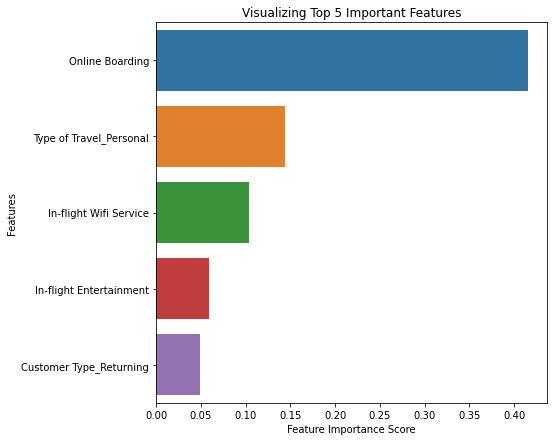

In [72]:
# create the Extreme Boost classifier model
xgb = XGBClassifier()
# fit the model
xgb.fit(Xtrain,ytrain)
# predict the model
ypred = xgb.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(xgb.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

In [73]:
print("accuracy_score for XGBoost", round(accuracy_score(ypred,ytest),2))

accuracy_score for XGBoost 0.96


## Hyper parameter Tuning using GridSearch and RandomSearch for RandomForest, GradientBoost, xgboost, and adaboost.

### `GridSearch` uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.


#### GridSearchCV for RandomForest

from sklearn.model_selection import GridSearchCV
## Building Random Forest Classifier
rfc = RandomForestClassifier()

# Initializing GridSearchCV() object and fitting it with hyperparameters
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(rfc, param_grid, cv = 10, scoring='accuracy')

clf.fit(Xtrain, ytrain)

 ## Getting the Best Hyperparameters
print(clf.best_estimator_)

 ## Getting the Best Hyperparameters
print(clf.best_params_)

Finally, **hyperparameter tuning** is finding the best combination of hyperparameters that gives the best performance according to the defined scoring metric.

# We can check the best parameter by using the best_params_ function
print(f'Accuracy - : {clf.score(Xtest, ytest):.3f}')

## Build Randomforest Classifier with best hyperparameters
df_rfc = RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200,random_state=1)
#fit the model
df_rfc.fit(Xtrain,ytrain)
#predict the model
rf_ypred = df_rfc.predict(Xtest)

# Summarize feature importance scores
feature_imp = pd.Series(df_rfc.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

# list top 5 important features
feature_imp = feature_imp[:5]

# display the scores of top 5
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

#### RandomizedSearchCV for RandomForest

from sklearn.model_selection import RandomizedSearchCV
forest_params = [{'max_depth': list(range(10, 25)), 
                  'max_features': list(range(0,15))}]
                  
rf_RandomGrid = RandomizedSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

# Fitting RandomSearchCV
rf_RandomGrid.fit(Xtrain, ytrain)

# Finding the best parameters
print(rf_RandomGrid.best_estimator_)

# Checking the accuracy using RandomSearchCV
print (f'Test Accuracy - : {rf_RandomGrid.score(Xtest,ytest):.3f}')

#### 2) Find fields that are dependent using chi square (for categorical variables)

The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset.

In [124]:
from scipy.stats import chi2_contingency

In [125]:
cat_val = data.select_dtypes("object")

In [126]:
cat_val.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,First-time,Business,Business,Neutral or Dissatisfied
1,Female,Returning,Business,Business,Satisfied
2,Male,Returning,Business,Business,Satisfied
3,Male,Returning,Business,Business,Satisfied
4,Female,Returning,Business,Business,Satisfied


## Chi square test for target variable "Satisfaction" column.

### <font color='sky blue'>Check correlation between "Type of Travel" and Target column "Satisfaction"</font>

In [127]:
# create contingency table
data_crosstab = pd.crosstab(cat_val['Type of Travel'],
                            cat_val['Satisfaction'],
                           margins=True, margins_name="Total")

data_crosstab

Satisfaction,Neutral or Dissatisfied,Satisfied,Total
Type of Travel,,,
Business,37337,52356,89693
Personal,36115,4072,40187
Total,73452,56428,129880


In [128]:
cat_table = pd.crosstab(cat_val['Type of Travel'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))
print('Expected',expected)

chi-sqaure statistics 26282.521 and p_value 0.00
Expected [[50724.74773637 38968.25226363]
 [22727.25226363 17459.74773637]]


In [129]:
# significance level
alpha = 0.05

In [130]:
# Calcualtion of Chisquare
chi_square = 0
rows = cat_val['Type of Travel'].unique()
columns = cat_val['Satisfaction'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E


In [131]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 26284.48428060006  and p value is: 0.0
Null Hypothesis is rejected.


In [132]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 26284.48428060006  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


### <font color='sky blue'>Check correlation between "Class" and Target column "Satisfaction"</font>

In [136]:
# create contingency table
data_crosstab = pd.crosstab(cat_val['Class'],
                            cat_val['Satisfaction'],
                           margins=True, margins_name="Total")
data_crosstab

Satisfaction,Neutral or Dissatisfied,Satisfied,Total
Class,,,
Business,18994,43166,62160
Economy,47366,10943,58309
Economy Plus,7092,2319,9411
Total,73452,56428,129880


In [134]:
cat_table = pd.crosstab(cat_val['Class'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))
print('Expected',expected)

chi-sqaure statistics 32906.172 and p_value 0.00
Expected [[35153.80597475 27006.19402525]
 [32975.92137358 25333.07862642]
 [ 5322.27265168  4088.72734832]]


In [137]:
# significance level
alpha = 0.05

In [139]:
# Calcualtion of Chisquare
chi_square = 0
rows = cat_val['Class'].unique()
columns = cat_val['Satisfaction'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [140]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 32906.17185866312  and p value is: 0.0
Null Hypothesis is rejected.


In [141]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 32906.17185866312  and critical value is: 5.991464547107979
Null Hypothesis is rejected.


### <font color='sky blue'>Check correlation between "Gender" and Target column "Satisfaction"</font>

In [143]:
# create contingency table
data_crosstab = pd.crosstab(cat_val['Gender'],
                            cat_val['Satisfaction'],
                           margins=True, margins_name="Total")
data_crosstab

Satisfaction,Neutral or Dissatisfied,Satisfied,Total
Gender,,,
Female,37630,28269,65899
Male,35822,28159,63981
Total,73452,56428,129880


In [144]:
cat_table = pd.crosstab(cat_val['Gender'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))
print('Expected',expected)

chi-sqaure statistics 16.352 and p_value 0.00
Expected [[37268.35038497 28630.64961503]
 [36183.64961503 27797.35038497]]


In [145]:
# significance level
alpha = 0.05

In [147]:
# Calcualtion of Chisquare
chi_square = 0
rows = cat_val['Gender'].unique()
columns = cat_val['Satisfaction'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [148]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 16.39738987668928  and p value is: 5.1355899645555425e-05
Null Hypothesis is rejected.


In [149]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 16.39738987668928  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


### <font color='sky blue'>Check correlation between "Customer Type" and Target column "Satisfaction"</font>

In [150]:
# create contingency table
data_crosstab = pd.crosstab(cat_val['Customer Type'],
                            cat_val['Satisfaction'],
                           margins=True, margins_name="Total")
data_crosstab

Satisfaction,Neutral or Dissatisfied,Satisfied,Total
Customer Type,,,
First-time,18080,5700,23780
Returning,55372,50728,106100
Total,73452,56428,129880


In [151]:
cat_table = pd.crosstab(cat_val['Customer Type'],cat_val['Satisfaction'])
chi2, p, dof, expected  = chi2_contingency(cat_table.values)
print('chi-sqaure statistics %0.3f and p_value %0.2f'%(chi2,p))
print('Expected',expected)

chi-sqaure statistics 4493.189 and p_value 0.00
Expected [[13448.47982753 10331.52017247]
 [60003.52017247 46096.47982753]]


In [152]:
# significance level
alpha = 0.05

In [153]:
# Calcualtion of Chisquare
chi_square = 0
rows = cat_val['Customer Type'].unique()
columns = cat_val['Satisfaction'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [154]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4494.159093024363  and p value is: 0.0
Null Hypothesis is rejected.


In [155]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4494.159093024363  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


### After removing Multicollinearity

In [87]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1)

In [88]:
corrmatrix = Xtrain.corr() # check correlation between each other

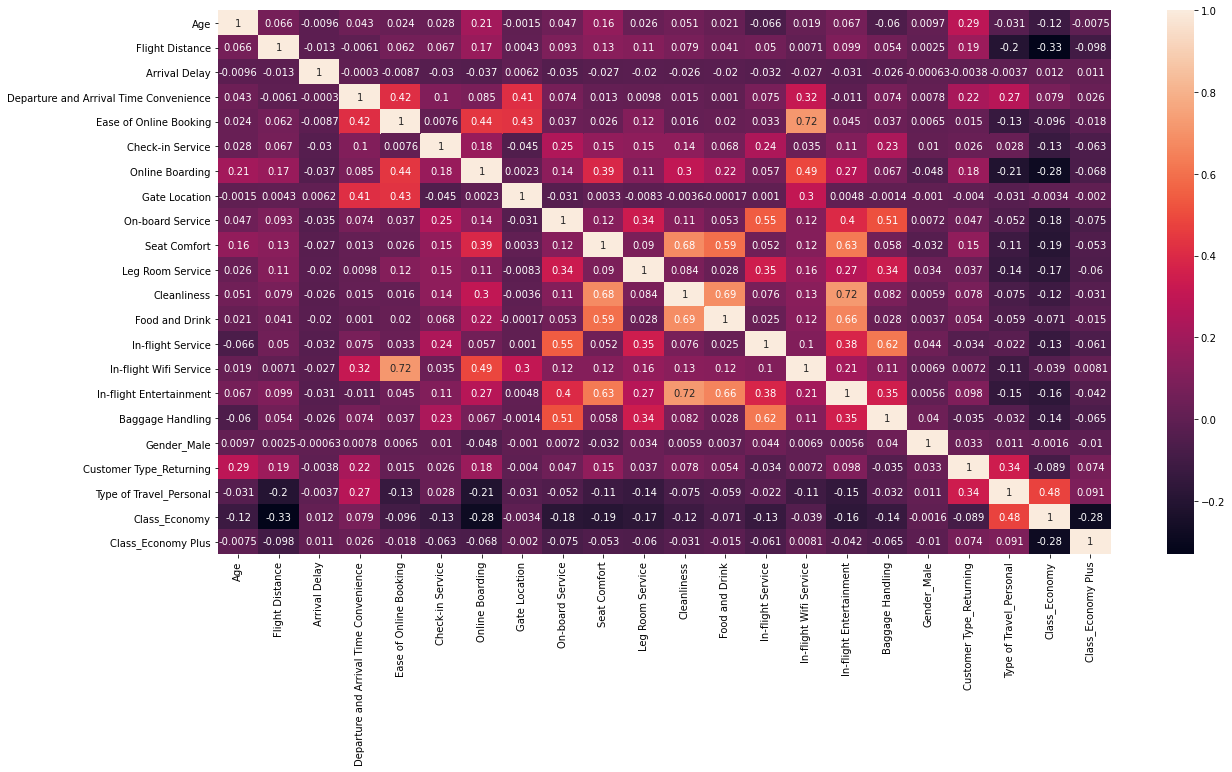

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True)
plt.show()

After visualizing, we observed that `Arrival Delay`and `Departure Delay` having strong correlation. 

In [90]:
# finding correlation among features 
def correlation(df,threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [91]:
# finding correlation features who having more than 60%
corr_feature = correlation(Xtrain,0.6)
corr_feature

{'Baggage Handling',
 'Cleanliness',
 'Food and Drink',
 'In-flight Entertainment',
 'In-flight Wifi Service'}

In [92]:
Xtrain.shape, Xtest.shape

((103046, 22), (11450, 22))

In [93]:
# Drop those feature
Xtrain.drop(labels=corr_feature,axis=1,inplace=True)
Xtest.drop(labels=corr_feature,axis=1,inplace=True)

In [94]:
Xtrain.shape,Xtest.shape

((103046, 17), (11450, 17))

##### `using summary of logit regression results we will check wheather feature having multicollinearity.

In [95]:
import statsmodels.api as sm
#Model statistics
#Must add constant for y-intercept
model = sm.Logit(ytrain, sm.add_constant(Xtrain)).fit()
y_pred = model.predict(sm.add_constant(Xtest))
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.350863
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               103046
Model:                          Logit   Df Residuals:                   103028
Method:                           MLE   Df Model:                           17
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.4818
Time:                        09:07:10   Log-Likelihood:                -36155.
converged:                       True   LL-Null:                       -69771.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.1631   

#### Now again build logistic regression model to check accuracy after removing multicollinearity

In [96]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(Xtrain,ytrain)

LogisticRegression()

In [97]:
ypred = logistic.predict(Xtest)
print("accuracy_score for Logistic after multi-collinearity", round(accuracy_score(ypred,ytest),2))

accuracy_score for Logistic after multi-collinearity 0.81


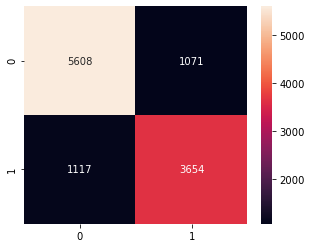

In [98]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(ypred,ytest),annot=True,fmt='g')
plt.show()

### Now again remove Gate Location feature form the data.
## Drop Gate Location

In [99]:
# Drop those feature
Xtrain.drop('Gate Location',axis=1,inplace=True)
Xtest.drop('Gate Location',axis=1,inplace=True)

In [100]:
Xtrain.shape,Xtest.shape

((103046, 16), (11450, 16))

In [101]:
import statsmodels.api as sm
#Model statistics
#Must add constant for y-intercept
model1 = sm.Logit(ytrain, sm.add_constant(Xtrain)).fit()
y_pred = model1.predict(sm.add_constant(Xtest))
print_model1 = model1.summary()
print(print_model1)

Optimization terminated successfully.
         Current function value: 0.350879
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               103046
Model:                          Logit   Df Residuals:                   103029
Method:                           MLE   Df Model:                           16
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.4818
Time:                        09:07:12   Log-Likelihood:                -36157.
converged:                       True   LL-Null:                       -69771.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.1329   

In [102]:
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()
logistic1.fit(Xtrain,ytrain)

LogisticRegression()

In [103]:
ypred = logistic1.predict(Xtest)
print("accuracy_score for Logistic after multi-collinearity", round(accuracy_score(ypred,ytest),2))

accuracy_score for Logistic after multi-collinearity 0.81


# <font color='red'>Anova test</font>

In [104]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2.0,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26.0,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0.0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0.0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0.0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  float64
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

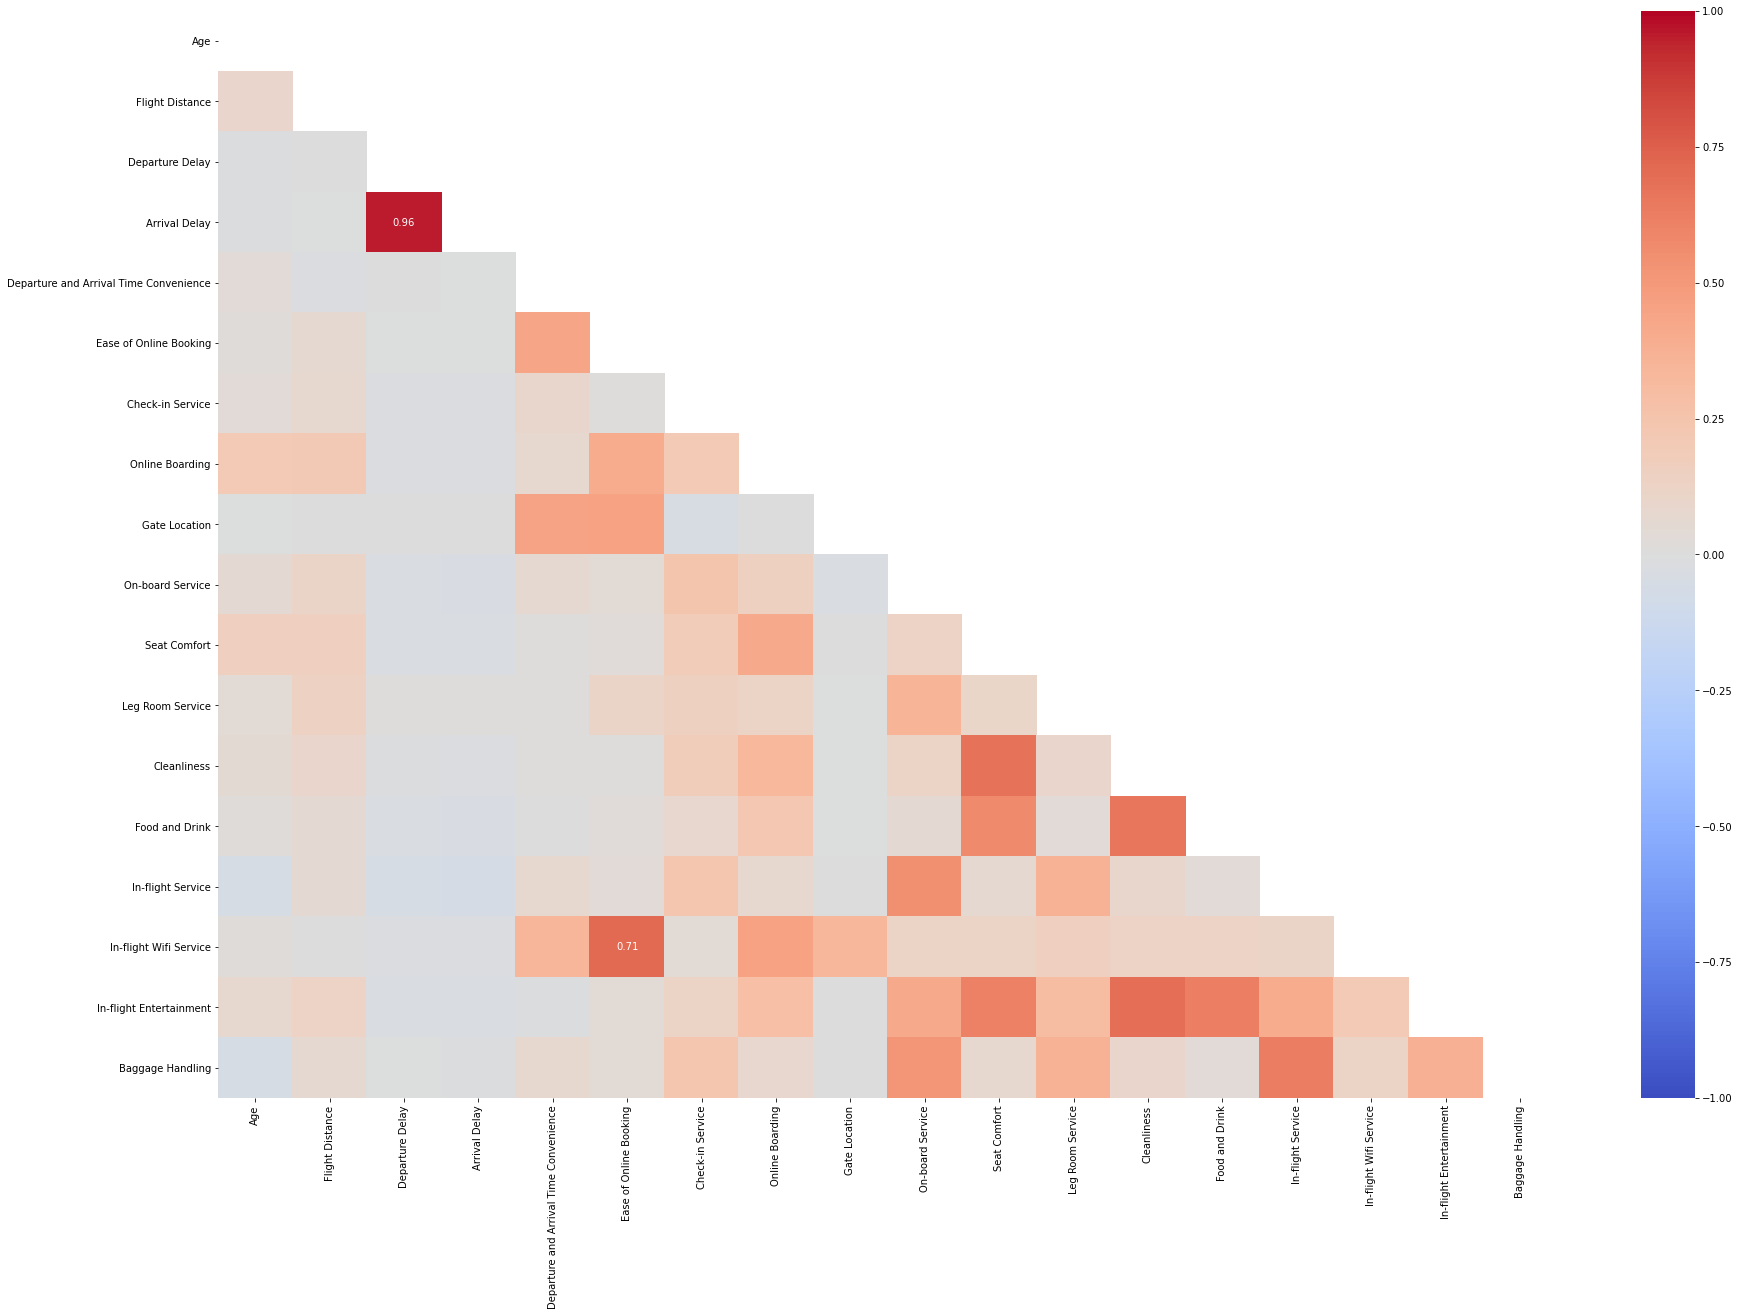

In [106]:
##Computing the correlation coefficient with Satisfaction

# set figure size
plt.figure(figsize=(30,20))

corr = data.drop('Satisfaction',axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,vmax=1.0,vmin=-1.0,cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.7 or less than -0.7 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

In [107]:
# get average of satifaction
data.groupby(data.Satisfaction).mean().T

Satisfaction,Neutral or Dissatisfied,Satisfied
Age,37.650997,41.741015
Flight Distance,929.715420,1529.539165
Departure Delay,16.406837,12.509782
Arrival Delay,17.049919,12.541382
Departure and Arrival Time Convenience,3.130221,2.963068
Ease of Online Booking,2.549393,3.026955
Check-in Service,3.042967,3.649004
Online Boarding,2.658621,4.025856
Gate Location,2.980055,2.972850
On-board Service,3.019537,3.856171


In [108]:
# Get anova test for satistifaction 
from scipy.stats import f_oneway

In [109]:
satisfied = data[data.Satisfaction=='Satisfied']
non_satisfied = data[data.Satisfaction=='Neutral or Dissatisfied']

In [110]:
f_oneway(satisfied['Flight Distance'], non_satisfied['Flight Distance'])

F_onewayResult(statistic=12665.66093590265, pvalue=0.0)

In [111]:
 def anova(feature,label):
        groups = data[feature].unique() # discover each unique group value
        grouped_values = [] # create a list of keep track of the label sub-lists
        for group in groups: # for each unique group value
            grouped_values.append(data[data[feature]==group][label]) # append sub-lists of label value into the list
            sns.histplot(data=data, x=label,hue=feature,kde=True);
        return f_oneway(*grouped_values) # use the '*' symbol to dynamically input

f: 12665.660935902653
p: 0.0


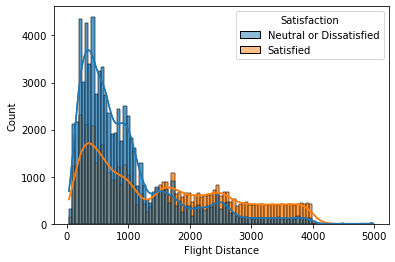

In [112]:
f,p = anova('Satisfaction','Flight Distance')
print(f'f: {f}')
print(f'p: {p}')

f: 2378.024191091601
p: 0.0


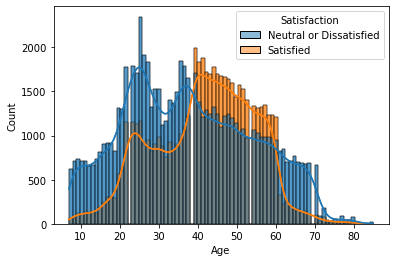

In [113]:
f,p = anova('Satisfaction','Age')
print(f'f: {f}')
print(f'p: {p}')

f: 9952.855693127649
p: 0.0


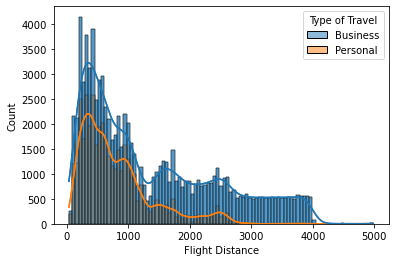

In [114]:
f,p = anova('Type of Travel','Flight Distance')
print(f'f: {f}')
print(f'p: {p}')

# <font color='blue'>for all case we can reject the null hypothesis and results are statistically significant because in all case we have p-value having less than 0.05.</font>